# Deep Neural Networks 
## Lecture 07

## Implementation of Neural Network in TensorFlow


## 1. Import Statements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
 
%matplotlib inline

2023-11-23 17:35:21.205695: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-23 17:35:21.208983: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-23 17:35:21.252305: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-23 17:35:21.252337: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-23 17:35:21.252360: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

## 2. Setup Global Parameters

In [2]:
###----------------
### Some parameters
###----------------

# Directory locations
inpDir = '../../input'
outDir = '../output'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 1001  # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE = 0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 6),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')


## 3. Generate Data Set
<div style="font-family: Arial; font-size:1.2em;color:white;">
Sklearn's dataset generator is good source of data for learning. To keep the example simple, I'll suggest  <a href="http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html">make_moon</a> dataset generator.
</div>

In [3]:
X,y = datasets.make_moons(n_samples=N_SAMPLES,shuffle=True,noise=NOISE,random_state=RANDOM_STATE)
X.shape,y.shape

((1000, 2), (1000,))

## 4. Visualization
<p style="font-family: Arial; font-size:1.2em;color:white;">
DataFrames are easier to visualize
</p>

In [4]:
data_df=pd.DataFrame(X,columns=['A','B'])
data_df['target']=y
data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,1000.0,0.490841,0.898951,-1.688795,-0.149565,0.500100,1.095048,2.419113
B,1000.0,0.239025,0.540082,-0.955280,-0.205090,0.241163,0.680394,1.612075
target,1000.0,0.500000,0.500250,0.000000,0.000000,0.500000,1.000000,1.000000


In [7]:
data_df['target'].unique()

array([0, 1])

### 4.1 Different ways of plotting data

<Axes: xlabel='A', ylabel='B'>

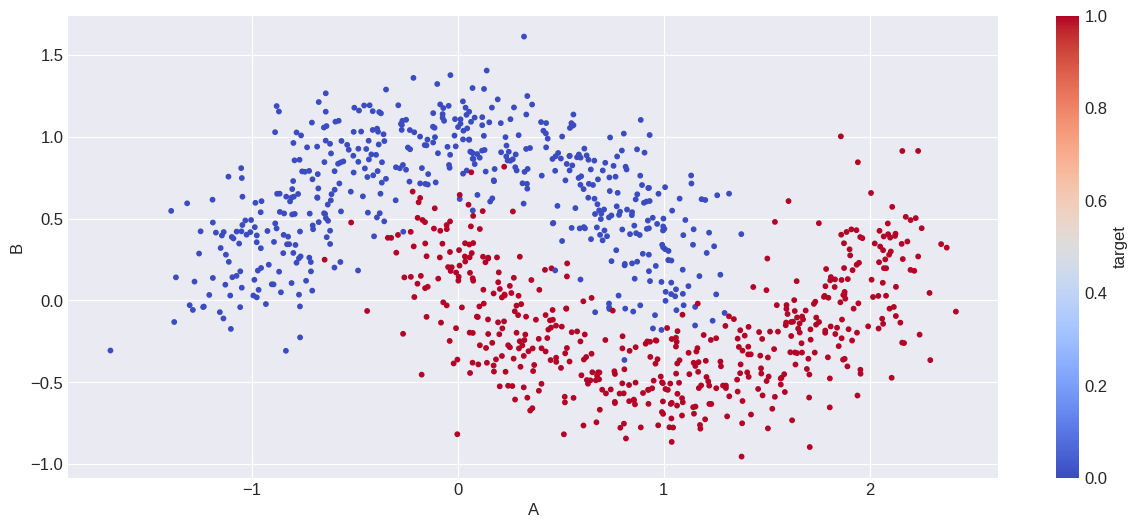

In [8]:
data_df.plot.scatter('A','B',s=10,c='target',cmap=CMAP)

<Axes: xlabel='target'>

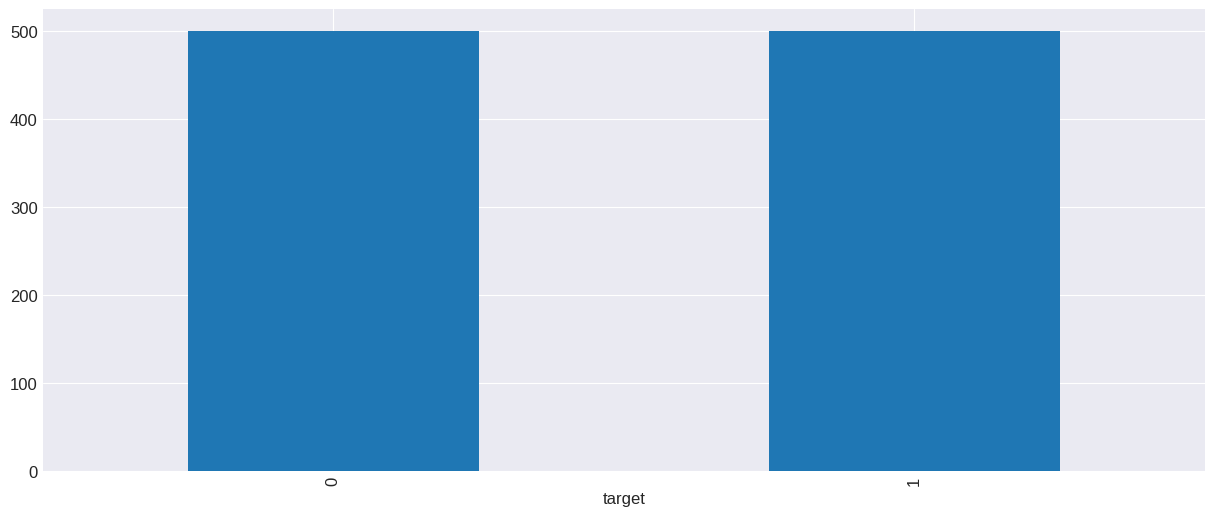

In [9]:
data_df['target'].value_counts().plot(kind='bar')

/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/dai/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


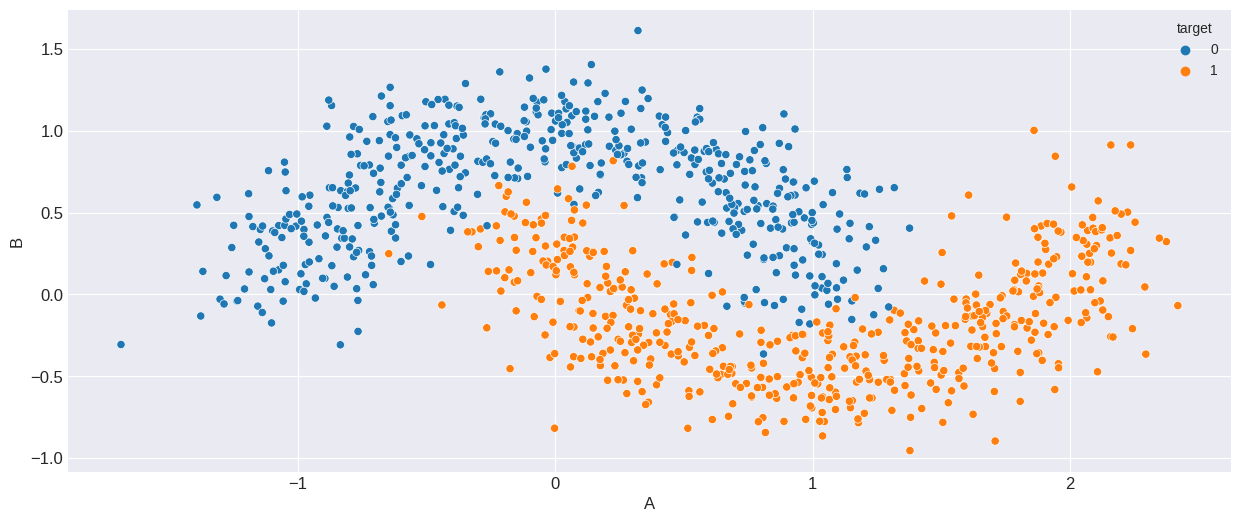

In [10]:
sns.scatterplot(x='A',y='B',data=data_df,hue='target');

<div style="font-family: Arial; font-size:1.2em;">
    We will keep 10%, i.e. 100 records for testing and remaining records will be used in training. Note that the data is already random.
</div>

In [11]:


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,stratify=y,random_state=RANDOM_STATE)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [12]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation='tanh'),
    tf.keras.layers.Dense(2)
])

In [13]:
loss_fn=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [14]:
model.compile(optimizer='rmsprop',loss=loss_fn,metrics=['accuracy'])

In [15]:
history=model.fit(X_train,y_train,validation_data=[X_test,y_test],epochs=EPOCHS,verbose=2)

Epoch 1/1001
25/25 - 1s - loss: 0.8528 - accuracy: 0.2313 - val_loss: 0.8373 - val_accuracy: 0.2300 - 653ms/epoch - 26ms/step
Epoch 2/1001
25/25 - 0s - loss: 0.8123 - accuracy: 0.2175 - val_loss: 0.7993 - val_accuracy: 0.2250 - 87ms/epoch - 3ms/step
Epoch 3/1001
25/25 - 0s - loss: 0.7794 - accuracy: 0.1975 - val_loss: 0.7653 - val_accuracy: 0.1800 - 89ms/epoch - 4ms/step
Epoch 4/1001
25/25 - 0s - loss: 0.7500 - accuracy: 0.1550 - val_loss: 0.7355 - val_accuracy: 0.1400 - 79ms/epoch - 3ms/step
Epoch 5/1001
25/25 - 0s - loss: 0.7231 - accuracy: 0.1287 - val_loss: 0.7064 - val_accuracy: 0.2300 - 67ms/epoch - 3ms/step
Epoch 6/1001
25/25 - 0s - loss: 0.6969 - accuracy: 0.4675 - val_loss: 0.6790 - val_accuracy: 0.6550 - 109ms/epoch - 4ms/step
Epoch 7/1001
25/25 - 0s - loss: 0.6713 - accuracy: 0.6375 - val_loss: 0.6521 - val_accuracy: 0.7000 - 116ms/epoch - 5ms/step
Epoch 8/1001
25/25 - 0s - loss: 0.6465 - accuracy: 0.6888 - val_loss: 0.6263 - val_accuracy: 0.7200 - 110ms/epoch - 4ms/step
Epo

Epoch 67/1001
25/25 - 0s - loss: 0.2923 - accuracy: 0.8737 - val_loss: 0.3038 - val_accuracy: 0.8600 - 96ms/epoch - 4ms/step
Epoch 68/1001
25/25 - 0s - loss: 0.2921 - accuracy: 0.8737 - val_loss: 0.3035 - val_accuracy: 0.8600 - 69ms/epoch - 3ms/step
Epoch 69/1001
25/25 - 0s - loss: 0.2920 - accuracy: 0.8763 - val_loss: 0.3036 - val_accuracy: 0.8600 - 110ms/epoch - 4ms/step
Epoch 70/1001
25/25 - 0s - loss: 0.2918 - accuracy: 0.8737 - val_loss: 0.3036 - val_accuracy: 0.8600 - 98ms/epoch - 4ms/step
Epoch 71/1001
25/25 - 0s - loss: 0.2919 - accuracy: 0.8750 - val_loss: 0.3035 - val_accuracy: 0.8600 - 103ms/epoch - 4ms/step
Epoch 72/1001
25/25 - 0s - loss: 0.2915 - accuracy: 0.8750 - val_loss: 0.3035 - val_accuracy: 0.8600 - 95ms/epoch - 4ms/step
Epoch 73/1001
25/25 - 0s - loss: 0.2916 - accuracy: 0.8763 - val_loss: 0.3036 - val_accuracy: 0.8650 - 102ms/epoch - 4ms/step
Epoch 74/1001
25/25 - 0s - loss: 0.2914 - accuracy: 0.8737 - val_loss: 0.3034 - val_accuracy: 0.8650 - 101ms/epoch - 4ms/s

Epoch 133/1001
25/25 - 0s - loss: 0.2739 - accuracy: 0.8838 - val_loss: 0.2905 - val_accuracy: 0.8850 - 70ms/epoch - 3ms/step
Epoch 134/1001
25/25 - 0s - loss: 0.2733 - accuracy: 0.8838 - val_loss: 0.2907 - val_accuracy: 0.8850 - 89ms/epoch - 4ms/step
Epoch 135/1001
25/25 - 0s - loss: 0.2727 - accuracy: 0.8838 - val_loss: 0.2896 - val_accuracy: 0.8900 - 62ms/epoch - 2ms/step
Epoch 136/1001
25/25 - 0s - loss: 0.2721 - accuracy: 0.8825 - val_loss: 0.2890 - val_accuracy: 0.8900 - 80ms/epoch - 3ms/step
Epoch 137/1001
25/25 - 0s - loss: 0.2714 - accuracy: 0.8863 - val_loss: 0.2886 - val_accuracy: 0.8900 - 63ms/epoch - 3ms/step
Epoch 138/1001
25/25 - 0s - loss: 0.2708 - accuracy: 0.8850 - val_loss: 0.2877 - val_accuracy: 0.8950 - 66ms/epoch - 3ms/step
Epoch 139/1001
25/25 - 0s - loss: 0.2702 - accuracy: 0.8863 - val_loss: 0.2874 - val_accuracy: 0.8950 - 68ms/epoch - 3ms/step
Epoch 140/1001
25/25 - 0s - loss: 0.2692 - accuracy: 0.8850 - val_loss: 0.2872 - val_accuracy: 0.8950 - 101ms/epoch - 

Epoch 198/1001
25/25 - 0s - loss: 0.2106 - accuracy: 0.9112 - val_loss: 0.2333 - val_accuracy: 0.9150 - 66ms/epoch - 3ms/step
Epoch 199/1001
25/25 - 0s - loss: 0.2095 - accuracy: 0.9125 - val_loss: 0.2324 - val_accuracy: 0.9150 - 83ms/epoch - 3ms/step
Epoch 200/1001
25/25 - 0s - loss: 0.2084 - accuracy: 0.9137 - val_loss: 0.2317 - val_accuracy: 0.9150 - 92ms/epoch - 4ms/step
Epoch 201/1001
25/25 - 0s - loss: 0.2073 - accuracy: 0.9100 - val_loss: 0.2304 - val_accuracy: 0.9200 - 95ms/epoch - 4ms/step
Epoch 202/1001
25/25 - 0s - loss: 0.2060 - accuracy: 0.9112 - val_loss: 0.2289 - val_accuracy: 0.9200 - 96ms/epoch - 4ms/step
Epoch 203/1001
25/25 - 0s - loss: 0.2049 - accuracy: 0.9162 - val_loss: 0.2277 - val_accuracy: 0.9200 - 66ms/epoch - 3ms/step
Epoch 204/1001
25/25 - 0s - loss: 0.2038 - accuracy: 0.9162 - val_loss: 0.2271 - val_accuracy: 0.9200 - 89ms/epoch - 4ms/step
Epoch 205/1001
25/25 - 0s - loss: 0.2026 - accuracy: 0.9162 - val_loss: 0.2251 - val_accuracy: 0.9250 - 87ms/epoch - 3

Epoch 263/1001
25/25 - 0s - loss: 0.1529 - accuracy: 0.9337 - val_loss: 0.1732 - val_accuracy: 0.9450 - 63ms/epoch - 3ms/step
Epoch 264/1001
25/25 - 0s - loss: 0.1524 - accuracy: 0.9350 - val_loss: 0.1731 - val_accuracy: 0.9450 - 82ms/epoch - 3ms/step
Epoch 265/1001
25/25 - 0s - loss: 0.1516 - accuracy: 0.9362 - val_loss: 0.1721 - val_accuracy: 0.9450 - 118ms/epoch - 5ms/step
Epoch 266/1001
25/25 - 0s - loss: 0.1512 - accuracy: 0.9350 - val_loss: 0.1718 - val_accuracy: 0.9450 - 89ms/epoch - 4ms/step
Epoch 267/1001
25/25 - 0s - loss: 0.1505 - accuracy: 0.9362 - val_loss: 0.1722 - val_accuracy: 0.9500 - 65ms/epoch - 3ms/step
Epoch 268/1001
25/25 - 0s - loss: 0.1501 - accuracy: 0.9362 - val_loss: 0.1712 - val_accuracy: 0.9450 - 116ms/epoch - 5ms/step
Epoch 269/1001
25/25 - 0s - loss: 0.1494 - accuracy: 0.9388 - val_loss: 0.1709 - val_accuracy: 0.9500 - 82ms/epoch - 3ms/step
Epoch 270/1001
25/25 - 0s - loss: 0.1488 - accuracy: 0.9375 - val_loss: 0.1701 - val_accuracy: 0.9500 - 109ms/epoch 

Epoch 328/1001
25/25 - 0s - loss: 0.1234 - accuracy: 0.9538 - val_loss: 0.1459 - val_accuracy: 0.9600 - 65ms/epoch - 3ms/step
Epoch 329/1001
25/25 - 0s - loss: 0.1232 - accuracy: 0.9525 - val_loss: 0.1450 - val_accuracy: 0.9600 - 86ms/epoch - 3ms/step
Epoch 330/1001
25/25 - 0s - loss: 0.1229 - accuracy: 0.9513 - val_loss: 0.1457 - val_accuracy: 0.9600 - 77ms/epoch - 3ms/step
Epoch 331/1001
25/25 - 0s - loss: 0.1224 - accuracy: 0.9550 - val_loss: 0.1472 - val_accuracy: 0.9600 - 75ms/epoch - 3ms/step
Epoch 332/1001
25/25 - 0s - loss: 0.1221 - accuracy: 0.9563 - val_loss: 0.1449 - val_accuracy: 0.9600 - 109ms/epoch - 4ms/step
Epoch 333/1001
25/25 - 0s - loss: 0.1218 - accuracy: 0.9563 - val_loss: 0.1442 - val_accuracy: 0.9600 - 68ms/epoch - 3ms/step
Epoch 334/1001
25/25 - 0s - loss: 0.1216 - accuracy: 0.9563 - val_loss: 0.1446 - val_accuracy: 0.9600 - 73ms/epoch - 3ms/step
Epoch 335/1001
25/25 - 0s - loss: 0.1212 - accuracy: 0.9550 - val_loss: 0.1440 - val_accuracy: 0.9600 - 101ms/epoch -

Epoch 393/1001
25/25 - 0s - loss: 0.1068 - accuracy: 0.9613 - val_loss: 0.1354 - val_accuracy: 0.9650 - 97ms/epoch - 4ms/step
Epoch 394/1001
25/25 - 0s - loss: 0.1069 - accuracy: 0.9600 - val_loss: 0.1354 - val_accuracy: 0.9650 - 104ms/epoch - 4ms/step
Epoch 395/1001
25/25 - 0s - loss: 0.1067 - accuracy: 0.9600 - val_loss: 0.1355 - val_accuracy: 0.9650 - 74ms/epoch - 3ms/step
Epoch 396/1001
25/25 - 0s - loss: 0.1063 - accuracy: 0.9600 - val_loss: 0.1355 - val_accuracy: 0.9650 - 64ms/epoch - 3ms/step
Epoch 397/1001
25/25 - 0s - loss: 0.1062 - accuracy: 0.9613 - val_loss: 0.1342 - val_accuracy: 0.9650 - 66ms/epoch - 3ms/step
Epoch 398/1001
25/25 - 0s - loss: 0.1059 - accuracy: 0.9638 - val_loss: 0.1354 - val_accuracy: 0.9650 - 83ms/epoch - 3ms/step
Epoch 399/1001
25/25 - 0s - loss: 0.1058 - accuracy: 0.9638 - val_loss: 0.1348 - val_accuracy: 0.9650 - 104ms/epoch - 4ms/step
Epoch 400/1001
25/25 - 0s - loss: 0.1057 - accuracy: 0.9638 - val_loss: 0.1354 - val_accuracy: 0.9650 - 92ms/epoch -

Epoch 458/1001
25/25 - 0s - loss: 0.0970 - accuracy: 0.9700 - val_loss: 0.1316 - val_accuracy: 0.9650 - 107ms/epoch - 4ms/step
Epoch 459/1001
25/25 - 0s - loss: 0.0969 - accuracy: 0.9700 - val_loss: 0.1306 - val_accuracy: 0.9650 - 64ms/epoch - 3ms/step
Epoch 460/1001
25/25 - 0s - loss: 0.0966 - accuracy: 0.9675 - val_loss: 0.1319 - val_accuracy: 0.9650 - 71ms/epoch - 3ms/step
Epoch 461/1001
25/25 - 0s - loss: 0.0966 - accuracy: 0.9700 - val_loss: 0.1314 - val_accuracy: 0.9650 - 78ms/epoch - 3ms/step
Epoch 462/1001
25/25 - 0s - loss: 0.0964 - accuracy: 0.9688 - val_loss: 0.1318 - val_accuracy: 0.9650 - 84ms/epoch - 3ms/step
Epoch 463/1001
25/25 - 0s - loss: 0.0964 - accuracy: 0.9688 - val_loss: 0.1309 - val_accuracy: 0.9650 - 89ms/epoch - 4ms/step
Epoch 464/1001
25/25 - 0s - loss: 0.0963 - accuracy: 0.9688 - val_loss: 0.1307 - val_accuracy: 0.9650 - 78ms/epoch - 3ms/step
Epoch 465/1001
25/25 - 0s - loss: 0.0961 - accuracy: 0.9700 - val_loss: 0.1311 - val_accuracy: 0.9650 - 88ms/epoch - 

Epoch 523/1001
25/25 - 0s - loss: 0.0902 - accuracy: 0.9712 - val_loss: 0.1312 - val_accuracy: 0.9700 - 104ms/epoch - 4ms/step
Epoch 524/1001
25/25 - 0s - loss: 0.0901 - accuracy: 0.9688 - val_loss: 0.1306 - val_accuracy: 0.9700 - 105ms/epoch - 4ms/step
Epoch 525/1001
25/25 - 0s - loss: 0.0902 - accuracy: 0.9737 - val_loss: 0.1296 - val_accuracy: 0.9700 - 97ms/epoch - 4ms/step
Epoch 526/1001
25/25 - 0s - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.1295 - val_accuracy: 0.9700 - 92ms/epoch - 4ms/step
Epoch 527/1001
25/25 - 0s - loss: 0.0899 - accuracy: 0.9725 - val_loss: 0.1300 - val_accuracy: 0.9700 - 80ms/epoch - 3ms/step
Epoch 528/1001
25/25 - 0s - loss: 0.0899 - accuracy: 0.9712 - val_loss: 0.1297 - val_accuracy: 0.9700 - 90ms/epoch - 4ms/step
Epoch 529/1001
25/25 - 0s - loss: 0.0898 - accuracy: 0.9700 - val_loss: 0.1296 - val_accuracy: 0.9700 - 88ms/epoch - 4ms/step
Epoch 530/1001
25/25 - 0s - loss: 0.0897 - accuracy: 0.9725 - val_loss: 0.1297 - val_accuracy: 0.9700 - 92ms/epoch -

Epoch 588/1001
25/25 - 0s - loss: 0.0855 - accuracy: 0.9700 - val_loss: 0.1301 - val_accuracy: 0.9700 - 102ms/epoch - 4ms/step
Epoch 589/1001
25/25 - 0s - loss: 0.0854 - accuracy: 0.9725 - val_loss: 0.1311 - val_accuracy: 0.9700 - 94ms/epoch - 4ms/step
Epoch 590/1001
25/25 - 0s - loss: 0.0854 - accuracy: 0.9712 - val_loss: 0.1303 - val_accuracy: 0.9700 - 80ms/epoch - 3ms/step
Epoch 591/1001
25/25 - 0s - loss: 0.0855 - accuracy: 0.9725 - val_loss: 0.1306 - val_accuracy: 0.9700 - 104ms/epoch - 4ms/step
Epoch 592/1001
25/25 - 0s - loss: 0.0852 - accuracy: 0.9712 - val_loss: 0.1295 - val_accuracy: 0.9700 - 64ms/epoch - 3ms/step
Epoch 593/1001
25/25 - 0s - loss: 0.0853 - accuracy: 0.9737 - val_loss: 0.1308 - val_accuracy: 0.9650 - 103ms/epoch - 4ms/step
Epoch 594/1001
25/25 - 0s - loss: 0.0852 - accuracy: 0.9725 - val_loss: 0.1301 - val_accuracy: 0.9700 - 99ms/epoch - 4ms/step
Epoch 595/1001
25/25 - 0s - loss: 0.0852 - accuracy: 0.9712 - val_loss: 0.1304 - val_accuracy: 0.9650 - 68ms/epoch 

Epoch 653/1001
25/25 - 0s - loss: 0.0821 - accuracy: 0.9725 - val_loss: 0.1316 - val_accuracy: 0.9650 - 110ms/epoch - 4ms/step
Epoch 654/1001
25/25 - 0s - loss: 0.0821 - accuracy: 0.9700 - val_loss: 0.1321 - val_accuracy: 0.9650 - 62ms/epoch - 2ms/step
Epoch 655/1001
25/25 - 0s - loss: 0.0820 - accuracy: 0.9725 - val_loss: 0.1321 - val_accuracy: 0.9650 - 105ms/epoch - 4ms/step
Epoch 656/1001
25/25 - 0s - loss: 0.0821 - accuracy: 0.9725 - val_loss: 0.1327 - val_accuracy: 0.9650 - 74ms/epoch - 3ms/step
Epoch 657/1001
25/25 - 0s - loss: 0.0819 - accuracy: 0.9712 - val_loss: 0.1328 - val_accuracy: 0.9650 - 95ms/epoch - 4ms/step
Epoch 658/1001
25/25 - 0s - loss: 0.0818 - accuracy: 0.9725 - val_loss: 0.1313 - val_accuracy: 0.9650 - 82ms/epoch - 3ms/step
Epoch 659/1001
25/25 - 0s - loss: 0.0819 - accuracy: 0.9712 - val_loss: 0.1313 - val_accuracy: 0.9650 - 84ms/epoch - 3ms/step
Epoch 660/1001
25/25 - 0s - loss: 0.0817 - accuracy: 0.9750 - val_loss: 0.1328 - val_accuracy: 0.9650 - 104ms/epoch 

Epoch 718/1001
25/25 - 0s - loss: 0.0795 - accuracy: 0.9725 - val_loss: 0.1321 - val_accuracy: 0.9650 - 76ms/epoch - 3ms/step
Epoch 719/1001
25/25 - 0s - loss: 0.0794 - accuracy: 0.9725 - val_loss: 0.1340 - val_accuracy: 0.9650 - 90ms/epoch - 4ms/step
Epoch 720/1001
25/25 - 0s - loss: 0.0794 - accuracy: 0.9737 - val_loss: 0.1333 - val_accuracy: 0.9650 - 107ms/epoch - 4ms/step
Epoch 721/1001
25/25 - 0s - loss: 0.0793 - accuracy: 0.9725 - val_loss: 0.1337 - val_accuracy: 0.9650 - 66ms/epoch - 3ms/step
Epoch 722/1001
25/25 - 0s - loss: 0.0793 - accuracy: 0.9737 - val_loss: 0.1334 - val_accuracy: 0.9650 - 65ms/epoch - 3ms/step
Epoch 723/1001
25/25 - 0s - loss: 0.0793 - accuracy: 0.9725 - val_loss: 0.1339 - val_accuracy: 0.9650 - 111ms/epoch - 4ms/step
Epoch 724/1001
25/25 - 0s - loss: 0.0792 - accuracy: 0.9737 - val_loss: 0.1344 - val_accuracy: 0.9650 - 83ms/epoch - 3ms/step
Epoch 725/1001
25/25 - 0s - loss: 0.0791 - accuracy: 0.9737 - val_loss: 0.1342 - val_accuracy: 0.9650 - 66ms/epoch -

Epoch 783/1001
25/25 - 0s - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.1349 - val_accuracy: 0.9650 - 65ms/epoch - 3ms/step
Epoch 784/1001
25/25 - 0s - loss: 0.0770 - accuracy: 0.9750 - val_loss: 0.1377 - val_accuracy: 0.9600 - 87ms/epoch - 3ms/step
Epoch 785/1001
25/25 - 0s - loss: 0.0772 - accuracy: 0.9750 - val_loss: 0.1361 - val_accuracy: 0.9650 - 100ms/epoch - 4ms/step
Epoch 786/1001
25/25 - 0s - loss: 0.0775 - accuracy: 0.9725 - val_loss: 0.1357 - val_accuracy: 0.9650 - 107ms/epoch - 4ms/step
Epoch 787/1001
25/25 - 0s - loss: 0.0772 - accuracy: 0.9725 - val_loss: 0.1359 - val_accuracy: 0.9650 - 100ms/epoch - 4ms/step
Epoch 788/1001
25/25 - 0s - loss: 0.0771 - accuracy: 0.9737 - val_loss: 0.1370 - val_accuracy: 0.9650 - 113ms/epoch - 5ms/step
Epoch 789/1001
25/25 - 0s - loss: 0.0770 - accuracy: 0.9750 - val_loss: 0.1360 - val_accuracy: 0.9650 - 79ms/epoch - 3ms/step
Epoch 790/1001
25/25 - 0s - loss: 0.0773 - accuracy: 0.9750 - val_loss: 0.1365 - val_accuracy: 0.9650 - 94ms/epoch

Epoch 848/1001
25/25 - 0s - loss: 0.0756 - accuracy: 0.9737 - val_loss: 0.1395 - val_accuracy: 0.9600 - 85ms/epoch - 3ms/step
Epoch 849/1001
25/25 - 0s - loss: 0.0757 - accuracy: 0.9737 - val_loss: 0.1388 - val_accuracy: 0.9600 - 66ms/epoch - 3ms/step
Epoch 850/1001
25/25 - 0s - loss: 0.0757 - accuracy: 0.9750 - val_loss: 0.1393 - val_accuracy: 0.9600 - 65ms/epoch - 3ms/step
Epoch 851/1001
25/25 - 0s - loss: 0.0757 - accuracy: 0.9737 - val_loss: 0.1377 - val_accuracy: 0.9650 - 75ms/epoch - 3ms/step
Epoch 852/1001
25/25 - 0s - loss: 0.0755 - accuracy: 0.9750 - val_loss: 0.1363 - val_accuracy: 0.9650 - 106ms/epoch - 4ms/step
Epoch 853/1001
25/25 - 0s - loss: 0.0755 - accuracy: 0.9750 - val_loss: 0.1371 - val_accuracy: 0.9650 - 97ms/epoch - 4ms/step
Epoch 854/1001
25/25 - 0s - loss: 0.0755 - accuracy: 0.9750 - val_loss: 0.1368 - val_accuracy: 0.9650 - 72ms/epoch - 3ms/step
Epoch 855/1001
25/25 - 0s - loss: 0.0755 - accuracy: 0.9762 - val_loss: 0.1382 - val_accuracy: 0.9600 - 106ms/epoch -

Epoch 913/1001
25/25 - 0s - loss: 0.0741 - accuracy: 0.9762 - val_loss: 0.1393 - val_accuracy: 0.9650 - 87ms/epoch - 3ms/step
Epoch 914/1001
25/25 - 0s - loss: 0.0744 - accuracy: 0.9750 - val_loss: 0.1397 - val_accuracy: 0.9600 - 64ms/epoch - 3ms/step
Epoch 915/1001
25/25 - 0s - loss: 0.0742 - accuracy: 0.9750 - val_loss: 0.1393 - val_accuracy: 0.9600 - 92ms/epoch - 4ms/step
Epoch 916/1001
25/25 - 0s - loss: 0.0741 - accuracy: 0.9775 - val_loss: 0.1410 - val_accuracy: 0.9600 - 108ms/epoch - 4ms/step
Epoch 917/1001
25/25 - 0s - loss: 0.0742 - accuracy: 0.9737 - val_loss: 0.1394 - val_accuracy: 0.9600 - 93ms/epoch - 4ms/step
Epoch 918/1001
25/25 - 0s - loss: 0.0743 - accuracy: 0.9750 - val_loss: 0.1387 - val_accuracy: 0.9650 - 86ms/epoch - 3ms/step
Epoch 919/1001
25/25 - 0s - loss: 0.0743 - accuracy: 0.9762 - val_loss: 0.1396 - val_accuracy: 0.9600 - 106ms/epoch - 4ms/step
Epoch 920/1001
25/25 - 0s - loss: 0.0740 - accuracy: 0.9775 - val_loss: 0.1409 - val_accuracy: 0.9600 - 100ms/epoch 

Epoch 978/1001
25/25 - 0s - loss: 0.0730 - accuracy: 0.9750 - val_loss: 0.1389 - val_accuracy: 0.9650 - 93ms/epoch - 4ms/step
Epoch 979/1001
25/25 - 0s - loss: 0.0730 - accuracy: 0.9775 - val_loss: 0.1392 - val_accuracy: 0.9650 - 89ms/epoch - 4ms/step
Epoch 980/1001
25/25 - 0s - loss: 0.0731 - accuracy: 0.9775 - val_loss: 0.1403 - val_accuracy: 0.9650 - 93ms/epoch - 4ms/step
Epoch 981/1001
25/25 - 0s - loss: 0.0732 - accuracy: 0.9775 - val_loss: 0.1401 - val_accuracy: 0.9650 - 79ms/epoch - 3ms/step
Epoch 982/1001
25/25 - 0s - loss: 0.0729 - accuracy: 0.9775 - val_loss: 0.1396 - val_accuracy: 0.9650 - 94ms/epoch - 4ms/step
Epoch 983/1001
25/25 - 0s - loss: 0.0731 - accuracy: 0.9762 - val_loss: 0.1418 - val_accuracy: 0.9600 - 106ms/epoch - 4ms/step
Epoch 984/1001
25/25 - 0s - loss: 0.0732 - accuracy: 0.9762 - val_loss: 0.1413 - val_accuracy: 0.9600 - 88ms/epoch - 4ms/step
Epoch 985/1001
25/25 - 0s - loss: 0.0730 - accuracy: 0.9775 - val_loss: 0.1421 - val_accuracy: 0.9600 - 96ms/epoch - 

In [16]:
res_df=pd.DataFrame(history.history)
res_df

,loss,accuracy,val_loss,val_accuracy
0,0.852829,0.23125,0.837282,0.230
1,0.812321,0.21750,0.799270,0.225
2,0.779365,0.19750,0.765260,0.180
3,0.749993,0.15500,0.735506,0.140
4,0.723117,0.12875,0.706418,0.230
...,...,...,...,...
996,0.072845,0.97625,0.140484,0.965
997,0.072846,0.97625,0.141643,0.960
998,0.072711,0.97750,0.141739,0.960
999,0.072721,0.97750,0.142032,0.960


<Axes: >

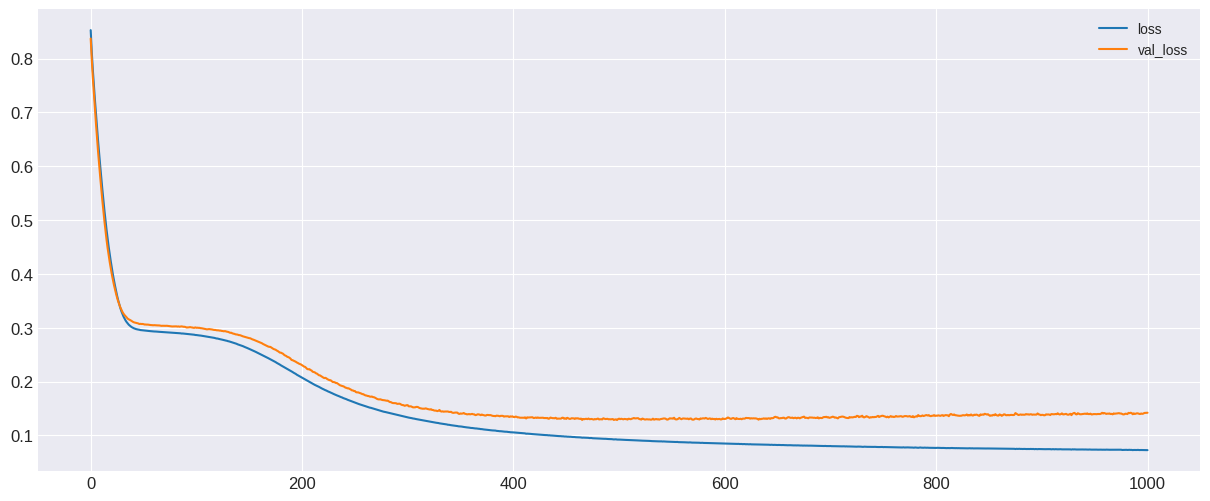

In [17]:
res_df.plot(y=['loss','val_loss'])

<Axes: >

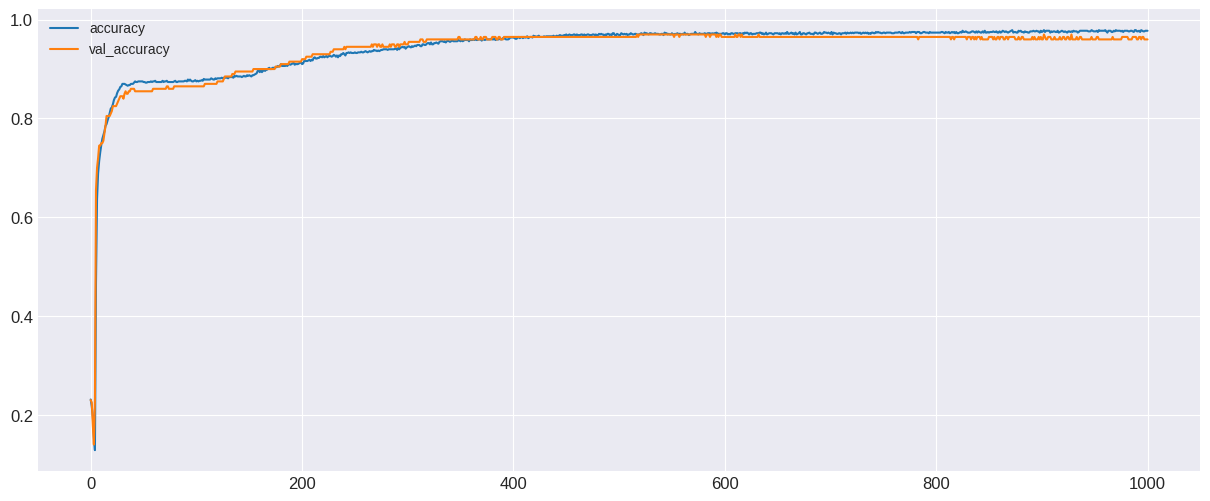

In [18]:
res_df.plot(y=['accuracy','val_accuracy'])

In [19]:
model.evaluate(X_train,y_train)

25/25 [==============================] - 0s 1ms/step - loss: 0.0721 - accuracy: 0.9787


[0.07214143872261047, 0.9787499904632568]

In [20]:
model.evaluate(X_test,y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1421 - accuracy: 0.9600


[0.14206980168819427, 0.9599999785423279]

In [21]:
y_pred=model.predict(X_train)

25/25 [==============================] - 0s 2ms/step


In [22]:
accuracy_score(np.argmax(y_pred,axis=1),y_train)

0.97875

In [23]:
y_pred=model.predict(X_test)
accuracy_score(np.argmax(y_pred,axis=1),y_test)

7/7 [==============================] - 0s 1ms/step


0.96

In [24]:
def fn_plot_decision_boundary(model,X_tr,y_tr,X_ts,y_ts):
    '''
        Attrib:
           pred_func : function based on predict method of the classifier
           X_tr : train feature matrix
           y_tr : train labels
           X_ts : test feature matrix
           y_ts : test labels
       Return:
           None
    '''
    
    # Set min and max values and give it some padding
    xMin, xMax = X_tr[:, 0].min() - .05, X_tr[:, 0].max() + .05
    yMin, yMax = X_tr[:, 1].min() - .05, X_tr[:, 1].max() + .05
    
    # grid size for mesh grid
    h = 0.01
    
    # Generate a grid of points with distance 'h' between them
    xx, yy = np.meshgrid(np.arange(xMin, xMax, h), np.arange(yMin, yMax, h))
    
    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    
    # Make its shape same as that of xx 
    Z = Z.reshape(xx.shape)

    fig = plt.figure()
    ax = fig.add_axes(111)
    
    # Now we have Z value corresponding to each of the combination of xx and yy
    # Plot the contour and training examples
    # contourf fills colour 
    ax.contourf(xx, yy, Z, cmap=CMAP) #, alpha = 0.8
    
    # Plotting scatter for train data
    ax.scatter(X_tr[:, 0], X_tr[:, 1], c=y_tr,
                                  s=30, edgecolor='k', cmap=plt.cm.coolwarm)
    
    
    # Plotting scatter for test data
    ax.scatter(X_ts[:, 0], X_ts[:, 1], c=y_ts,
                                  s=150, marker = '*',edgecolor='k', cmap=plt.cm.inferno )

    
    

3377/3377 [==============================] - 4s 1ms/step


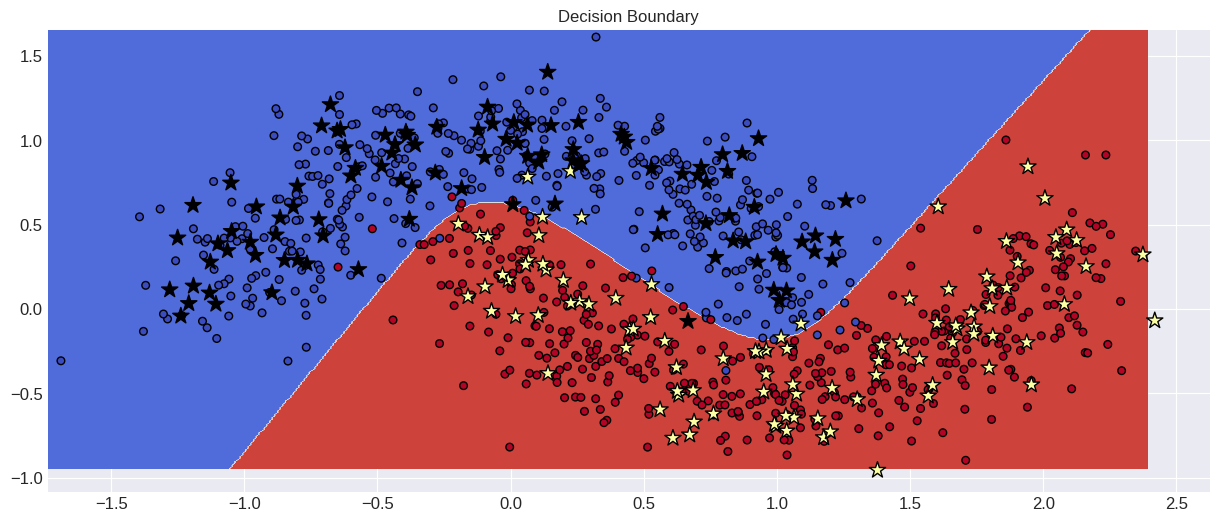

In [25]:
res_df=pd.DataFrame(history.history)

fn_plot_decision_boundary(model, X_train, y_train, X_test, y_test) # plot decision boundary for this plot

plt.title("Decision Boundary");

## Tracking
<div style="font-family: Arial; font-size:1.2em;color:black;">
Lets track the results across various implementations...

 |#|Implementation|Training Accuracy|Testing Accuracy|Remarks|
 |:-:|---|---|---|---|
 |1|Simple Perceptron|0.83111|0.89000||

## Notes:
<img src="images/dnn_nb_s03_fig1.png" width='350' align = 'left'>
<img src="images/dnn_nb_s03_fig2.png" width='350' align = 'right'>

## A note on Loss Function
<div style="font-family: Arial; font-size:1.2em;">
    <p>In logistic regression we are looking for if it is correct class or not. </p> 
    <p>For example, we want to know if there is a car in the picture or not. So the output is probability of a car in the picture.</p>
    <p><b>Mathematically speaking:</b></p>
    <p>$\hat{y} = p(y=1|x)$ i.e. given training sample $x$, we want to know probability of $y$ being 1.</p>
    <br>
    <p><b>Alternatively:</b></p>
    <p>If there is a car in the picture.  $\Rightarrow$  $y$ = 1 then $p(y|x)$ = $\hat{y}$.</p>
    <p>If there is <b>no</b> car in the picture.$\Rightarrow$ $y$ = 0 then $p(y|x)$ = 1 - $\hat{y}$.</p>
    <br>
    <p>We can summarize two equations as: $p(y|x)$ = $\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}$</p>
    <p>Above equation is $\hat{y}$ for y = 1 and (1 - $\hat{y}$) for y = 0.</p>
    <p>Taking log of above equation:</p>

$
\begin{aligned}
log [ p(y|x) ] & = log[\hat{y}^{y} * (1 - \hat{y}) ^{(1-y)}]\\
& = y * log(\hat{y}) + (1-y) * log(1 - \hat{y})\\
\end{aligned}
$
<p>Since we aim to minimize above function, add negative sign and our loss function becomes</p>

$
\begin{aligned}
L(\hat{y},y) =  -[y * log\hat{y} + (1-y) * log(1-\hat{y})]\\
\text{or}\\
L(a,y) =  - [ y * log ( a ) + ( 1 - y ) * log( 1 - a ) ]\\
\end{aligned}
$

|Case| y |Loss| a |-log(a)|-log(1-a)|
|:-: |:-:|:-: |:-:|  :-: |   :-:  |
| 1  | 0 | -log( 1 - a )| 0.000001 |13.8155|**1 e-6**|
| 2  | 0 | -log( 1 - a )| 0.999999 |1 e-6|**13.8155**|
| 3  | 1 | -log( a )| 0.000001 |**13.8155**|1 e-6|
| 4  | 1 | -log( a )| 0.999999 |**1 e-6**|13.8155|

</div>

<div style="font-family: Arial; font-size:1.2em;">
    <p>For binary classification the error = - $y * log(a)$</p>
    <p>We want to sum it up for all samples in the dataset. Hence:</p>

$
\begin{aligned}
p(\text{all ys | all rows of x}) & =  \Pi_{i=0}^m p(y|x)\\
log [ p(\text{all ys | all rows of x})] & =  log [ \Pi_{i=0}^m p(y|x) ]\\
& =  \sum_{i=0}^m log [ p(y|x) ] \\
& =  \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\text{Divide it by m to better scale the costs}\\
& = \frac{1}{m} * \sum_{i=0}^m [ y * log(\hat{y}) + (1-y) * log(1 - \hat{y}) ]\\
\end{aligned}
$

### Introducing $\mathrm{sigmoid}$ function for our binary output.
$$
\begin{aligned}
z & = x_1 . w_1 + x_2 . w_2 + b_1 \\
a & = \hat{y} = \sigma(z)\\
dz & = (a - y) \\
db & = dz\\
b & = b - \alpha . db\\
dw_1 & = x_1. dz\\
dw_2 & = x_2.dz\\
w_1 & = w_1 - \alpha . dw_1\\
w_2 & = w_1 - \alpha . dw_2\\
\end{aligned}
$$
### Sigmoid function
$$
\begin{align}
a &= \sigma(z)\\
&= \dfrac{1}{1 + e^{-z}}\\
\end{align}
$$
    <h3>Derivative of sigmoid function</h3>
$$
\begin{align}
\partial{a} &= \partial{(\sigma(z))}\\
&= \dfrac{\partial}{\partial{z}} \left[ \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{\partial}{\partial{z}} \left( 1 + \mathrm{e}^{-z} \right)^{-1} \\
&= -(1 + e^{-z})^{-2}(-e^{-z}) \\
&= \dfrac{e^{-z}}{\left(1 + e^{-z}\right)^2} \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{e^{-z}}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \dfrac{(1 + e^{-z}) - 1}{1 + e^{-z}}  \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ \dfrac{1 + e^{-z}}{1 + e^{-z}} - \dfrac{1}{1 + e^{-z}} \right] \\
&= \dfrac{1}{1 + e^{-z}\ } \circ \left[ 1 - \dfrac{1}{1 + e^{-z}} \right] \\
&= \sigma(z) \circ (1 - \sigma(z))\\
&= a \circ (1 - a)
\end{align}
$$
    </div>